In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
bike=pd.read_csv('BIKE DETAILS.csv')

In [3]:
df=bike.copy()

In [4]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
df.shape

(1061, 7)

In [6]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


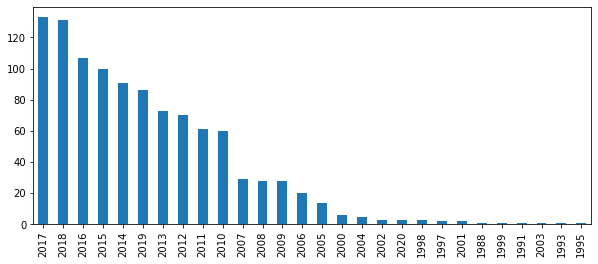

In [8]:
plt.figure(figsize=(10,4))
df['year'].value_counts().plot(kind='bar')
plt.show()

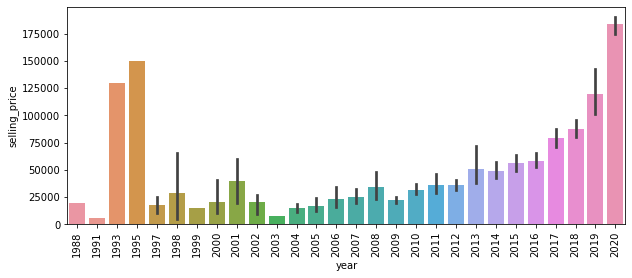

In [9]:
plt.figure(figsize=(10,4))
sns.barplot(df['year'],df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

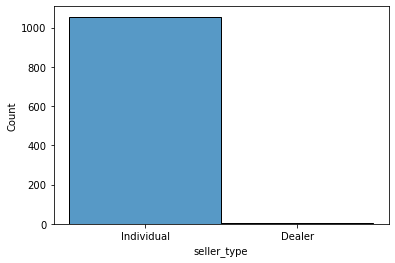

In [10]:
sns.histplot(df['seller_type'])
plt.show()

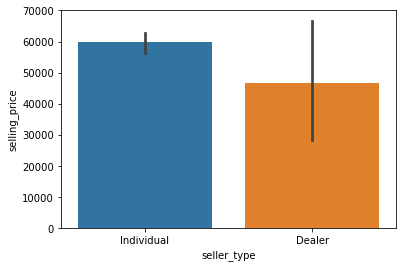

In [11]:
sns.barplot(df['seller_type'],df['selling_price'])
plt.show()

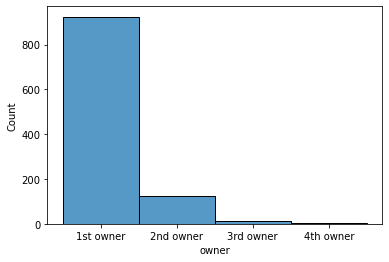

In [12]:
sns.histplot(df['owner'])
plt.show()

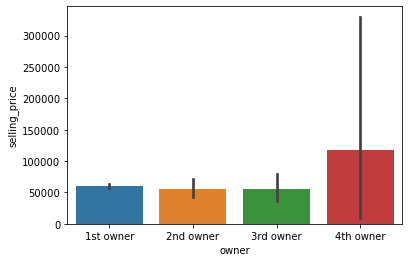

In [13]:
sns.barplot(df['owner'],df['selling_price'])
plt.show()

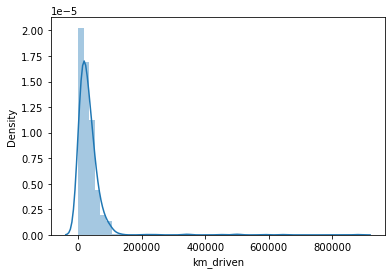

In [14]:
sns.distplot(df['km_driven'])
plt.show()

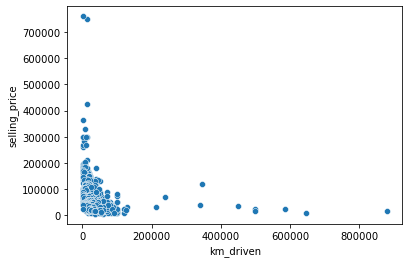

In [15]:
sns.scatterplot(df['km_driven'],df['selling_price'])
plt.show()

In [16]:
df['ex_imputed']=df['ex_showroom_price']
df['ex_imputed'][df['ex_imputed'].isnull()] = df['ex_imputed'].dropna().sample(df['ex_showroom_price'].isnull().sum()).values

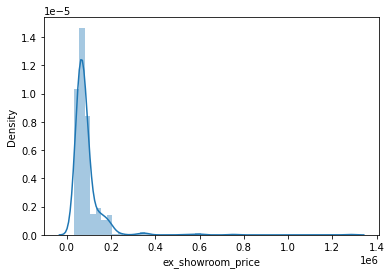

In [17]:
sns.distplot(df['ex_showroom_price'])
plt.show()

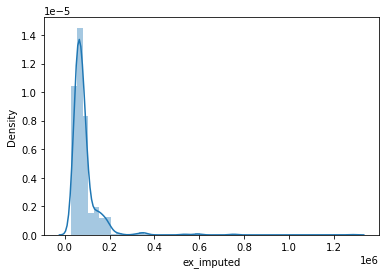

In [18]:
sns.distplot(df['ex_imputed'])
plt.show()

In [19]:
df['ex_showroom_price']=df['ex_imputed']
df.drop('ex_imputed',axis=1,inplace=True)
df['ex_showroom_price']=df['ex_showroom_price'].astype('int')

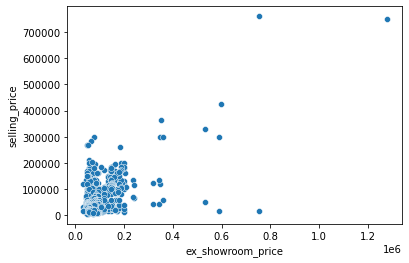

In [20]:
sns.scatterplot(df['ex_showroom_price'],df['selling_price'])
plt.show()

In [21]:
a=df['name'].str.split(' ')
for i in range(len(a)):
    a[i]=a[i][0]
a=a.str.replace('Royal','Royal Enfield')

In [22]:
for i in range(len(a)):
    if a.value_counts()[a[i]] < 2:
        a[i]=a.mode()[0]

In [23]:
df['Company']=a
df.drop('name',axis=1,inplace=True)

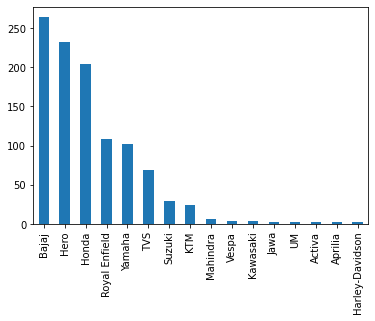

In [24]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

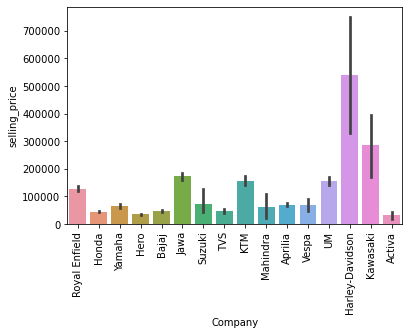

In [25]:
sns.barplot(df['Company'],df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

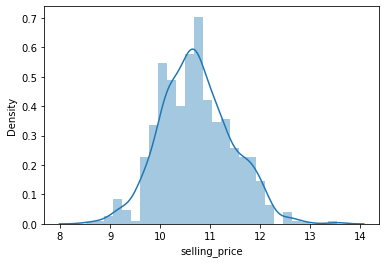

In [26]:
sns.distplot(np.log(df['selling_price']))
plt.show()

In [27]:
df['selling_price']=np.log(df['selling_price'])

In [28]:
df.corr()['selling_price']

selling_price        1.000000
year                 0.636213
km_driven           -0.299776
ex_showroom_price    0.367221
Name: selling_price, dtype: float64

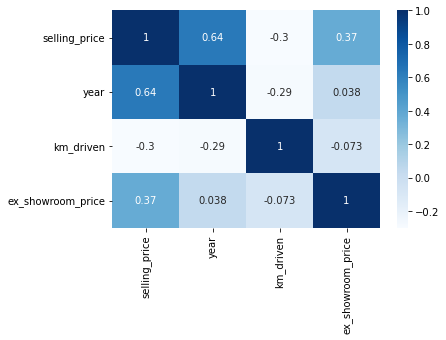

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [30]:
df.isnull().sum()

selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
Company              0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selling_price      1061 non-null   float64
 1   year               1061 non-null   int64  
 2   seller_type        1061 non-null   object 
 3   owner              1061 non-null   object 
 4   km_driven          1061 non-null   int64  
 5   ex_showroom_price  1061 non-null   int32  
 6   Company            1061 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 54.0+ KB


In [32]:
X=df.drop(['selling_price'],axis=1)
y=df['selling_price']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [34]:
df.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,Company
0,12.072541,2019,Individual,1st owner,350,59183,Royal Enfield
1,10.714418,2017,Individual,1st owner,5650,77545,Honda
2,11.918391,2018,Individual,1st owner,12000,148114,Royal Enfield
3,11.082143,2015,Individual,1st owner,23000,89643,Yamaha
4,9.903488,2011,Individual,2nd owner,21000,85011,Yamaha


### Linear Regression

In [35]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
    # We will not count price that's why our counting change
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7701583090911637
MAE 0.2628135100842484


### Ridge Regression

In [36]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7482237876225734
MAE 0.27624287839676


### Lasso Regression

In [37]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7604018161311961
MAE 0.2687889984926913


### KNN

In [38]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.2801516447877104
MAE 0.4644290216593031


### Decision Tree 

In [39]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7465971118071142
MAE 0.2775434840852035


### Adabost 

In [40]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7183919531193457
MAE 0.30169493849892726


### Gradient Boosting

In [41]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7563059164135203
MAE 0.2664466573556308


### Xgboost

In [42]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7752757982127488
MAE 0.2650179330262049


### Random Forest

In [43]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,5])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8101680344279683
MAE 0.23463048093102978


In [44]:
pickle.dump(df,open('df3.pkl','wb'))
pickle.dump(pipe,open('pipe3.pkl','wb'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>